# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Julie Kickstein

Datum: 17.11.2023

Gruppe: 99

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Welche spezifische Wärmekapazität besitzen die DS18B20 Sensoren?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


![Versuchsaufbau](figures/capacity.jpeg)

Für den Versuch werden zwei Behälter mit jeweils 300 ml Wasser befüllt. In dem einen Behälter findet sich heißes und im anderen kaltes Wasser. Die Sensoren werden jeweils in ein Gefäß gelegt und messen die jeweiligen Temperaturwerte. Nach kurzer Zeit wird das heiße Wasser zusammen mit dem Sensor in das Gefäß mit dem kalten Wasser gegossen. Die Messung wurde solange durchgeführt, bis die Sensoren die gleiche Temperatur anzeigten.

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [4]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path_capacity = "/home/jovyan/work/calorimetry_home/data/heat_capacity/20231117_Kalorimetrie_99_Julie Kickstein.h5"

# DONE #

In [5]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

with h5py.File(path_capacity, 'r') as f:
    capacity_data = f["RawData"]
    dataset_capacity = {}
    
    for uuid_key in capacity_data.keys():
        uuid_group = capacity_data[uuid_key]
        
        attributes = dict(uuid_group.attrs)
        
        temp_data = uuid_group['temperature'][:]
        time_data = uuid_group['timestamp'][:]
        
        dataset_capacity[uuid_key] = {
            'attributes': attributes,
            'temperature': temp_data,
            'timestamp': time_data
        }
    

# DONE #

#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


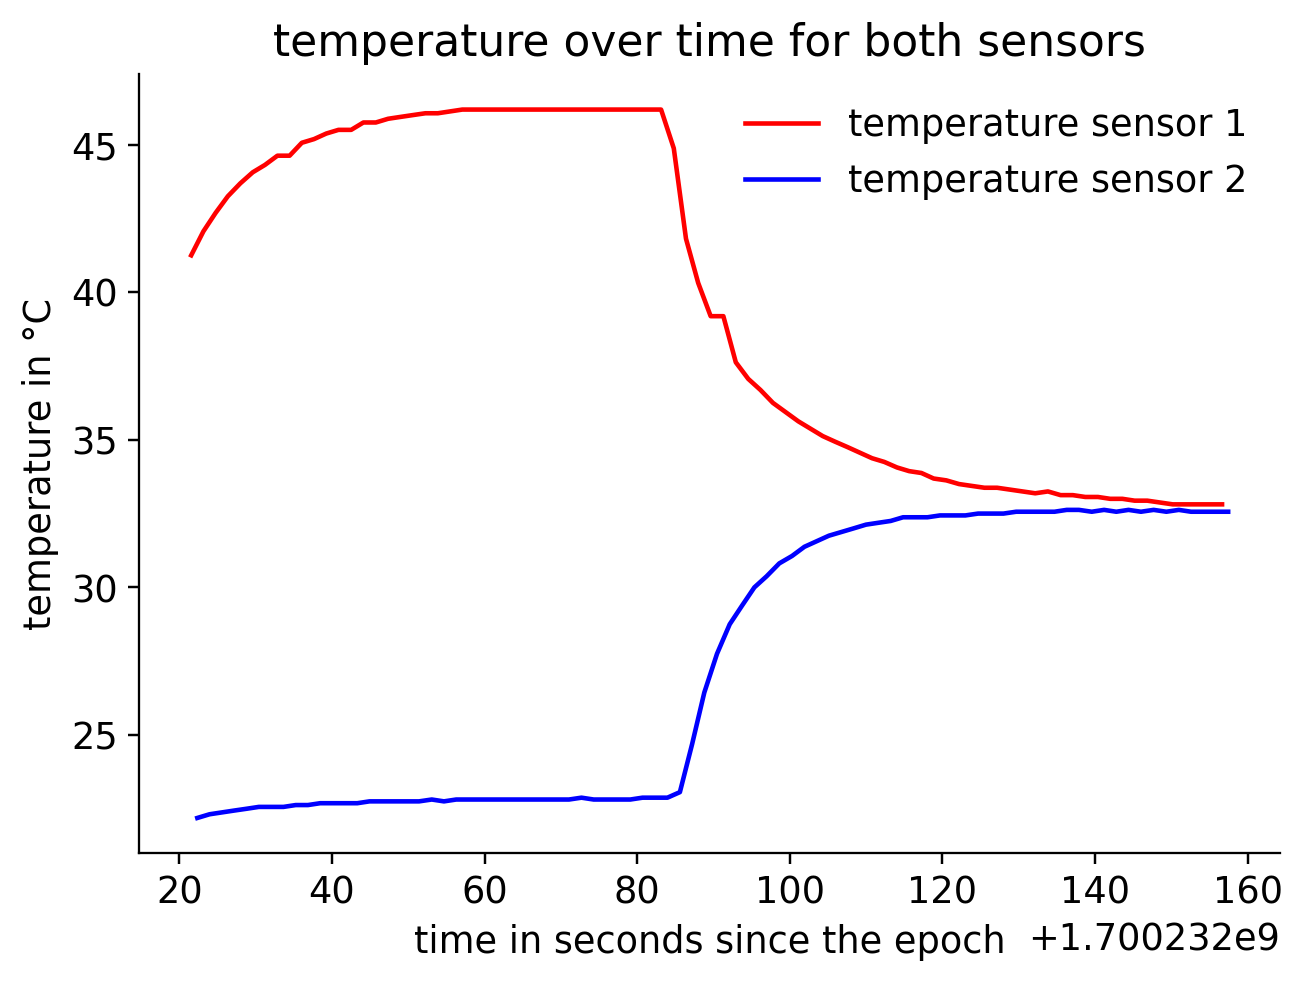

In [6]:
# TODO: Use the temperature and time data for plotting

# Daten von Sensor 1
uuid_1_data = dataset_capacity['1ee822cb-e29f-6a7f-8e1f-ecc9f433cf9e']
time_data_1 = uuid_1_data['timestamp']
temperature_data_1 = uuid_1_data['temperature']

# Daten von Sensor 2
uuid_2_data = dataset_capacity['1ee822cc-8cfc-68bc-bdcb-5fcdd9fe6243']
time_data_2 = uuid_2_data['timestamp']
temperature_data_2 = uuid_2_data['temperature']

plt.plot(time_data_1, temperature_data_1, label='temperature sensor 1', linewidth=1.5, color='red')
plt.plot(time_data_2, temperature_data_2, label='temperature sensor 2', linewidth=1.5, color='blue')


plt.title('temperature over time for both sensors')
plt.xlabel('time in seconds since the epoch')
plt.ylabel('temperature in °C')
plt.legend()
plt.show()


# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [8]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.

# Auslesen der Masse aus Probendatei
## mass_half entspricht der Masse eines Gefäßes, beide Gefäse besitzen die gleiche Masse
folder_path = "/home/jovyan/work/calorimetry_home/data/heat_capacity/"
mass = m_json.get_json_entry(folder_path, "1ee82db3-b603-6cad-bf03-e916d610feeb",['probe','metadata'])

mass_half = int(mass)/1000 # 


# um gesamte Wassermasse zu erhalten muss die Masse verdoppelt werden, außerdem wird sie in von g in kg umgerechnet
mass_total = (mass_half*2)

print('Gesamtmasse in kg:')
print(mass_total)

# DONE #

Gesamtmasse in kg:
0.6


#### (iV) Anfangs- und Endwert der Temperatur

In [9]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity

start_temp_1 = temperature_data_1[0]
end_temp_1 = temperature_data_1[-1]

start_temp_2 = temperature_data_2[0]
end_temp_2 = temperature_data_2[-1]

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [10]:
# TODO: Calculate heat capacity of the calorimeter

# m_add = m_cup da die gleiche Menge an Wasser verwendet wurde für heiß und kalt
# masse in kg
m_add = mass_half
m_cup = mass_half
# temperatur in °C -> durch Differenz in Formel in K
T_2 = start_temp_2
T_1 = start_temp_1
T_M = end_temp_1
# spez. Wärmekapazität von Wasser in kJ/kgK
c_w = water_heat_capa

capacity = (m_add*c_w*(T_2-T_M))/(T_M-T_1)-m_cup*c_w


# DONE #

#### (Vi) Ergebnis

In [11]:
# TODO: Print result

print('Wärmekapazität Wärmesensor in kJ/kgK')
print(capacity)

# DONE #

Wärmekapazität Wärmesensor in kJ/kgK
0.3251111111111109


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Im Vergleich zu vielen anderen Materialien ist die spez. Wärmekapazität sehr niedrig. Dies bedeutet, dass sich der Stoff schneller aufwärmt bzw. abkühlt als solche mit hoher Wärmekapazität.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Sehr viel Aufwand und teils schwierige Aufgaben. Der Versuch an sich hat Spaß gemacht.